Project Neural Networks

Import the necessary libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Mount the google drive and read the file

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import h5py
data = h5py.File('/content/drive/My Drive/DLCP/Neural Network Project/SVHN_single_grey1.h5',mode='r')

In [0]:
X_train = data['X_train'][:]
y_train = data['y_train'][:]
X_test = data['X_test'][:]
y_test = data['y_test'][:]

In [0]:
# Close the data file
data.close()

Initial checks of loaded data

In [6]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42000, 32, 32) (18000, 32, 32) (42000,) (18000,)


Label i: 2


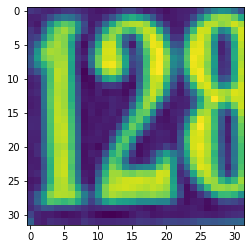

Label i: 6


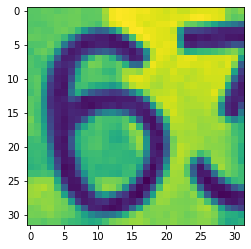

Label i: 7


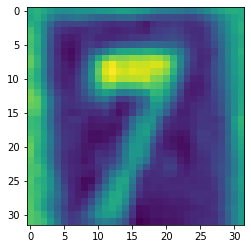

Label i: 4


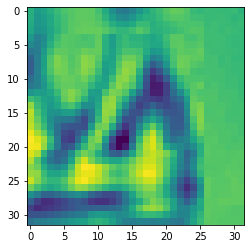

Label i: 4


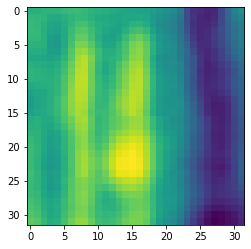

In [7]:
# Check the first 5 images and their labels
for i in range(5):
  print('Label i:', y_train[i])
  plt.figure(i)
  plt.imshow(X_train[i])
  plt.show()

Data Pre-processing

In [0]:
# Flatten/Reshape X data: (n, 32, 32) => (n, 1024)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42000, 1024) (18000, 1024) (42000,) (18000,)


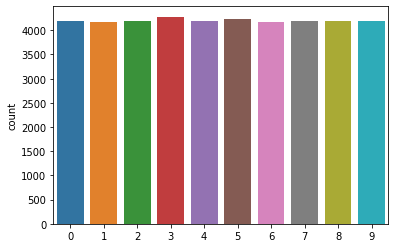

In [10]:
import seaborn as sns
sns.countplot(y_train)

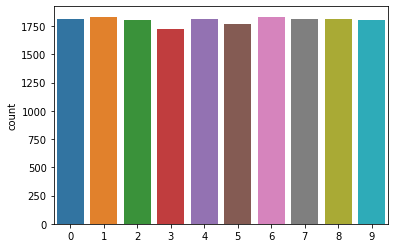

In [11]:
sns.countplot(y_test)

# All the numbers have approximately equal samples, both in the training and test sets. So there is no class imbalance.

k-Nearest Neighbor (kNN) classifier

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
# Create odd list of K to identify optimal number of neighbors
neighbors = list(range(9,29,2))
neighbors

[9, 11, 13, 15, 17, 19, 21, 23, 25, 27]

In [0]:
# We need to identify the optimal k neighbours. However the data set is too large to run several iterations with the whole dataset. 
# Since the numbers 2, 3 and 8 are the most commonly mistaken numbers in image recognition. We will use these to filter out the other 
# numbers in order to reduce our data size.
idx = (y_train == 2) | (y_train == 3) | (y_train == 8)
X = X_train[idx]
y = y_train[idx]

idxt = (y_test == 2) | (y_test == 3) | (y_test == 8)
Xt = X_test[idxt]
yt = y_test[idxt]

In [16]:
print(X.shape, Xt.shape, y.shape, yt.shape)

(12666, 1024) (5334, 1024) (12666,) (5334,)


In [17]:
# Import time to measure the time taken to fit and predict using KNN algo
from datetime import datetime

# Empty list that will hold accuracy scores
ac_scores = []

# Perform accuracy metrics for k values
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)

    tstart = datetime.now()
    knn.fit(X, y)
    # Predict the response
    y_pred = knn.predict(Xt)
    print('Time taken for k =', k,':', datetime.now() - tstart)

    # Evaluate accuracy
    scores = accuracy_score(yt, y_pred)
    print('k =',k,'\t Accuracy Score=', scores)
    ac_scores.append(scores)

# Changing to misclassification error
MSE = [1 - x for x in ac_scores]

# Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

Time taken for k = 9 : 0:02:02.802153
k = 9 	 Accuracy Score= 0.7054743157105362
Time taken for k = 11 : 0:02:03.255457
k = 11 	 Accuracy Score= 0.7064116985376828
Time taken for k = 13 : 0:02:03.648082
k = 13 	 Accuracy Score= 0.7069741282339708
Time taken for k = 15 : 0:02:03.963988
k = 15 	 Accuracy Score= 0.7103487064116986
Time taken for k = 17 : 0:02:04.267492
k = 17 	 Accuracy Score= 0.7122234720659918
Time taken for k = 19 : 0:02:04.330641
k = 19 	 Accuracy Score= 0.7189726284214473
Time taken for k = 21 : 0:02:04.617784
k = 21 	 Accuracy Score= 0.7176602924634421
Time taken for k = 23 : 0:02:07.159613
k = 23 	 Accuracy Score= 0.7210348706411699
Time taken for k = 25 : 0:02:06.036431
k = 25 	 Accuracy Score= 0.7178477690288714
Time taken for k = 27 : 0:02:06.474495
k = 27 	 Accuracy Score= 0.7210348706411699
The optimal number of neighbors is 23


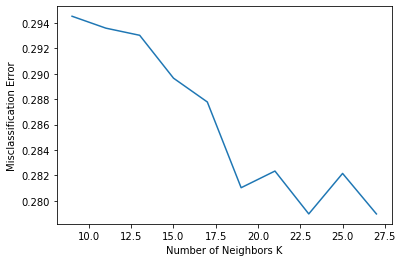

In [18]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [19]:
# We see an elbow at k=19 indicating a good tradeoff between #ofneighbors and the reduction in misclassification error
# But k=23 has the least MSE. So will use that.
# Instiantiate Learning model (k = 23)
knn = KNeighborsClassifier(n_neighbors=23)

tstart = datetime.now()
# Now train with the entire dataset
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print('Time taken: ', datetime.now() - tstart)

# Comparing actual response values (y_test) with predicted response values (y_pred) 
knn_acc = round(accuracy_score(y_test, knn_pred), 2)*100
print("K Nearest Neighbors model accuracy(in %):", knn_acc)

Time taken:  0:23:18.599796
K Nearest Neighbors model accuracy(in %): 53.0


In [20]:
# Create the confusion matrix
print('Confusion Matrix: \n', confusion_matrix(y_test, knn_pred), '\n')

# Measure performance for classifcation
print('Classification Report:')
print(classification_report(y_test, knn_pred))

# kNN is not performing very well as some of the digits are having f1 score 

Confusion Matrix: 
 [[1280   57   30   30   62   39  103   34   76  103]
 [  97 1347   54   81   68   32   39   49   30   31]
 [  97  238  981   93   46   41   32  145   46   84]
 [ 123  259  132  738   51  172   36   56   95   57]
 [ 107  261   33   59 1172   17   48   26   30   59]
 [ 168  169   53  244   72  689  147   39  110   77]
 [ 321  131   46   62  137  126  744   23  199   43]
 [  96  198  105   80   42   36   40 1136   26   49]
 [ 253  133   65  108  100  100  240   29  671  113]
 [ 331  147   58   87   65   98   53   75  112  778]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.71      0.55      1814
           1       0.46      0.74      0.57      1828
           2       0.63      0.54      0.58      1803
           3       0.47      0.43      0.45      1719
           4       0.65      0.65      0.65      1812
           5       0.51      0.39      0.44      1768
           6       0.50      0.41      0.45  

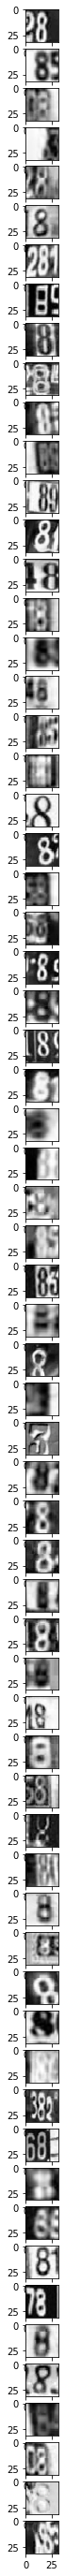

In [21]:
# Lets take just one of the digits misclassified, and check if the data is actually very confusing or our algorithm is not performing very well
# Lets take an 8 which was misclassified
idx = np.where((y_test == 8) & (knn_pred == 2))[0]
fig = plt.figure(figsize=(50,50))
for i in range(len(idx)):
    ax = fig.add_subplot(len(idx), 1, i+1)
    imgplot = ax.imshow(np.reshape(X_test[idx[i],:], (32,32)), cmap=plt.cm.get_cmap("Greys"))
    imgplot.set_interpolation('nearest')
plt.show()

# Below shows that the data does not seem to be too bad. The algo is not performing very well

In [0]:
# I used the GridSearchCV to get the parameter combination that would yield the best accuracy score. Here are the best params.
# But since it took close to 3 hours to run through the cross val, I have removed the steps from this version of the notebook.
# gs.best_params_
# {'algorithm': 'auto', 'n_jobs': 5, 'n_neighbors': 23, 'weights': 'distance'}

In [23]:
# We see a slightly improved accuracy when we run the kNN with the best params.
knn_best_params = KNeighborsClassifier(algorithm='auto', n_jobs=5, n_neighbors=23, weights='distance')

tstart = datetime.now()
# Now train with the entire dataset
knn_best_params.fit(X_train, y_train)
knn_pred = knn_best_params.predict(X_test)
print('Time taken: ', datetime.now() - tstart)

# Comparing actual response values (y_test) with predicted response values (y_pred) 
knnbp_acc = round(accuracy_score(y_test, knn_pred), 2)*100
print("K Nearest Neighbors model accuracy(in %):", knnbp_acc)

Time taken:  0:14:25.009214
K Nearest Neighbors model accuracy(in %): 54.0


Neural Network Model

In [24]:
# Import packages for creating the network
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras import optimizers
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [0]:
# Converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [26]:
y_test.shape

(18000, 10)

In [0]:
def nn_model_1():
  # Create a sequential model
  model = Sequential()

  # Add the layers, apply normalization and activation function
  # Input Layer
  model.add(Dense(300, input_shape = (1024, )))   # input_shape parameter is used to define the input layer
  model.add(BatchNormalization())                    
  model.add(Activation('relu'))   
  model.add(Dropout(0.2))
  # Hidden Layer 1
  model.add(Dense(150))
  model.add(BatchNormalization())                    
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  # Hidden Layer 2
  model.add(Dense(100))
  model.add(BatchNormalization())                    
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  # Output Layer
  model.add(Dense(10))
  model.add(Activation('softmax'))    # sfotmax is used for the last/output layer

  # SGD Optimizer using CrossEntropy Loss Function
  sgd = optimizers.SGD(lr = 0.001)
  model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
  
  return model

In [28]:
# Fit the NN model using training data
nn1 = nn_model_1()
history = nn1.fit(X_train, y_train, epochs = 10, verbose = 1)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





42000/42000 [==============================] - 20s 466us/step - loss: 2.5155 - acc: 0.1219
Epoch 2/10
42000/42000 [==============================] - 10s 229us/step - loss: 2.3076 - acc: 0.1739
Epoch 3/10
42000/42000 [==============================] - 10s 227us/step - loss: 2.1564 - acc: 0.2302
Epoch 4/10
42000/42000 [==============================] - 9s 226us/step - loss: 2.0345 - acc: 0.2769
Epoch 5/10
42000/42000 [==============================] - 9s 221us/step - loss: 1.9306 - acc: 0.3159
Epoch 6/10
42000/42000 [==============================] - 10s 229us/step - loss: 1.8319 - acc: 0.3590
Epoch 7/10
42000/42000 [==============================] - 10s 231us/step - loss: 1.7505 - acc: 0.3923
Epoch 8/10
42000/42000 [==============================] - 10s 227

In [29]:
results = nn1.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 59us/step


In [30]:
print('Test accuracy: ', results[1])

Test accuracy:  0.6398333333333334


In [31]:
# Reduce the batch_size while training, will take longer but provide greater accuracy
nn1 = nn_model_1()
history = nn1.fit(X_train, y_train, batch_size=10 , epochs = 10, verbose = 1)

Epoch 1/10
42000/42000 [==============================] - 31s 744us/step - loss: 2.4347 - acc: 0.1367
Epoch 2/10
42000/42000 [==============================] - 30s 709us/step - loss: 2.1813 - acc: 0.2177
Epoch 3/10
42000/42000 [==============================] - 29s 698us/step - loss: 1.9802 - acc: 0.3035
Epoch 4/10
42000/42000 [==============================] - 29s 684us/step - loss: 1.8354 - acc: 0.3648
Epoch 5/10
42000/42000 [==============================] - 29s 691us/step - loss: 1.7344 - acc: 0.4117
Epoch 6/10
42000/42000 [==============================] - 29s 680us/step - loss: 1.6540 - acc: 0.4474
Epoch 7/10
42000/42000 [==============================] - 28s 674us/step - loss: 1.5901 - acc: 0.4701
Epoch 8/10
42000/42000 [==============================] - 29s 683us/step - loss: 1.5383 - acc: 0.4910
Epoch 9/10
42000/42000 [==============================] - 29s 685us/step - loss: 1.5034 - acc: 0.5073
Epoch 10/10
42000/42000 [==============================] - 28s 678us/step - loss: 

In [32]:
results2 = nn1.evaluate(X_test, y_test)

18000/18000 [==============================] - 1s 60us/step


In [33]:
print('Test accuracy: ', results2[1])
# Accuracy has improved from ~64% to ~70.0%

Test accuracy:  0.6991666666666667


In [0]:
# Lets try with a different optimizer and loss function
def nn_model_2():
  # Create a sequential model
  model = Sequential()

  # Add the layers, apply normalization and activation function
  # Input Layer
  model.add(Dense(300, input_shape = (1024, )))   # input_shape parameter is used to define the input layer
  model.add(BatchNormalization())                    
  model.add(Activation('relu'))   
  model.add(Dropout(0.2))
  # Hidden Layer 1
  model.add(Dense(150))
  model.add(BatchNormalization())                    
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  # Hidden Layer 2
  model.add(Dense(100))
  model.add(BatchNormalization())                    
  model.add(Activation('relu'))
  model.add(Dropout(0.2))
  # Output Layer
  model.add(Dense(10))
  model.add(Activation('softmax'))    # sfotmax is used for the last/output layer

  # SGD Optimizer using CrossEntropy Loss Function
  ada = optimizers.adagrad(lr = 0.001)
  model.compile(optimizer = ada, loss = 'categorical_crossentropy', metrics = ['accuracy'])
  
  return model

In [36]:
# Reduce the batch_size while training, will take longer but provide greater accuracy
nn2 = nn_model_2()
history = nn2.fit(X_train, y_train, batch_size=10 , epochs = 10, verbose = 1)

Epoch 1/10
42000/42000 [==============================] - 31s 731us/step - loss: 2.3744 - acc: 0.1602
Epoch 2/10
42000/42000 [==============================] - 30s 718us/step - loss: 2.1793 - acc: 0.2269
Epoch 3/10
42000/42000 [==============================] - 30s 724us/step - loss: 2.0612 - acc: 0.2729
Epoch 4/10
42000/42000 [==============================] - 29s 695us/step - loss: 1.9837 - acc: 0.3064
Epoch 5/10
42000/42000 [==============================] - 30s 710us/step - loss: 1.9217 - acc: 0.3327
Epoch 6/10
42000/42000 [==============================] - 29s 698us/step - loss: 1.8704 - acc: 0.3543
Epoch 7/10
42000/42000 [==============================] - 31s 731us/step - loss: 1.8261 - acc: 0.3705
Epoch 8/10
42000/42000 [==============================] - 30s 724us/step - loss: 1.7945 - acc: 0.3851
Epoch 9/10
42000/42000 [==============================] - 30s 711us/step - loss: 1.7627 - acc: 0.3969
Epoch 10/10
42000/42000 [==============================] - 30s 714us/step - loss: 

In [37]:
results3 = nn2.evaluate(X_test, y_test)
print('Test accuracy: ', results3[1])
# Neither adam or adagrad optimizers are improving accuracy of the model

18000/18000 [==============================] - 1s 67us/step
Test accuracy:  0.6355


In [51]:
print('Model \t Accuracy \tDescription')
print('kNN \t', str(knn_acc), '\t\tk-Nearest Neighbors with k=23 and Default Parameters')
print('kNN \t', str(knnbp_acc), '\t\tk-Nearest Neighbors with k=23 and Best Parameters of GridSearchCV')
print('NN \t', str(round(results[1], 2)*100), '\t\tNeural Network with activation, batch normalization & dropout layers')
print('NN \t', str(round(results2[1], 2)*100), '\t\tNeural Network with modified batch size and the above activation, batch normalization & dropout layers')
print('NN \t', str(round(results3[1], 2)*100), '\t\tNeural Network adagrad optimizer')

Model 	 Accuracy 	Description
kNN 	 53.0 		k-Nearest Neighbors with k=23 and Default Parameters
kNN 	 54.0 		k-Nearest Neighbors with k=23 and Best Parameters of GridSearchCV
NN 	 64.0 		Neural Network with activation, batch normalization & dropout layers
NN 	 70.0 		Neural Network with modified batch size and the above activation, batch normalization & dropout layers
NN 	 64.0 		Neural Network adagrad optimizer


As we can see, the Neural Network with the modified batch size has the best accuracy for this data.